![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Natural Language Processing (NLP)

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

### Task: Sourcing

The first stage involves sourcing and reading the textual content of scientific papers. You find an example pdf file in ``../lit/nonanswers.pdf``. Please [download](https://scholar.google.de/) and analyze at least one additional paper of your choice (make sure to commit the paper to your repository).

Use an appropriate PDF reading library or tool to programmatically extract the text. You can find an example below, however, you are free to use any Python library you like.

In [5]:
# Step 1: Install pdfminer.six if you haven't already
# You can install it using conda or pip, see 
  # https://anaconda.org/conda-forge/pdfminer.six
  # https://pypi.org/project/pdfminer.six/

# Step 2: Import the required module
from pdfminer.high_level import extract_text

# Step 3: Extract text from PDF file
extracted_text = extract_text('../lit/nonanswers.pdf')
print(extracted_text[0:80])

“Let me get back to you” –
A machine learning approach to measuring
non-answers



### Task: Pre-processing

Pre-processing is a critical step aimed at cleaning and preparing the text data for analysis. Steps that you should consider:

* Removing punctuation, numbers and special characters using regular expressions.
* Converting all the text to a uniform case (usually lower case) to ensure that the analysis is not case-sensitive.
* Stop word removal, i.e. eliminating commonly used words (e.g., 'and', 'the', 'is') that do not contribute significantly to the overall meaning and can skew the analysis.
* Other potential pre-processing steps might include stemming and lemmatization, depending on the specific requirements and goals of the analysis. (optional)

In [6]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from openai import OpenAI


# Pre-processing steps
# 1. Remove punctuation, numbers, and special characters
cleaned_text = re.sub(r'[^A-Za-z\s]', '', extracted_text)

# 2. Convert to lower case
cleaned_text = cleaned_text.lower()

# 3. Remove stop words
stop_words = set(ENGLISH_STOP_WORDS)
filtered_text = ' '.join([word for word in cleaned_text.split() if word not in stop_words])


ImportError: cannot import name 'OpenAI' from 'openai' (f:\python location\Lib\site-packages\openai\__init__.py)

### Task: Analysis

The final stage is the analysis of the pre-processed text, in order to extract meaningful context. This may involve:

* Frequency Analysis: Determining the most commonly occurring words or phrases, which can provide initial insights into the primary focus areas of the papers. Consider, e.g. a word cloud as a visualization.
* Contextual Analysis: Using more advanced NLP techniques such as Word Embedding or Topic Modeling to understand the context of the papers.
* Sentiment analysis: We would expect that scientific papers are written in a neutral tone, can you confirm this?
* Summarization: Employing algorithms to generate concise summaries of the papers, capturing the key points and findings.

Pick any method that you like (you are allowed to use ChatGPT's API as well).

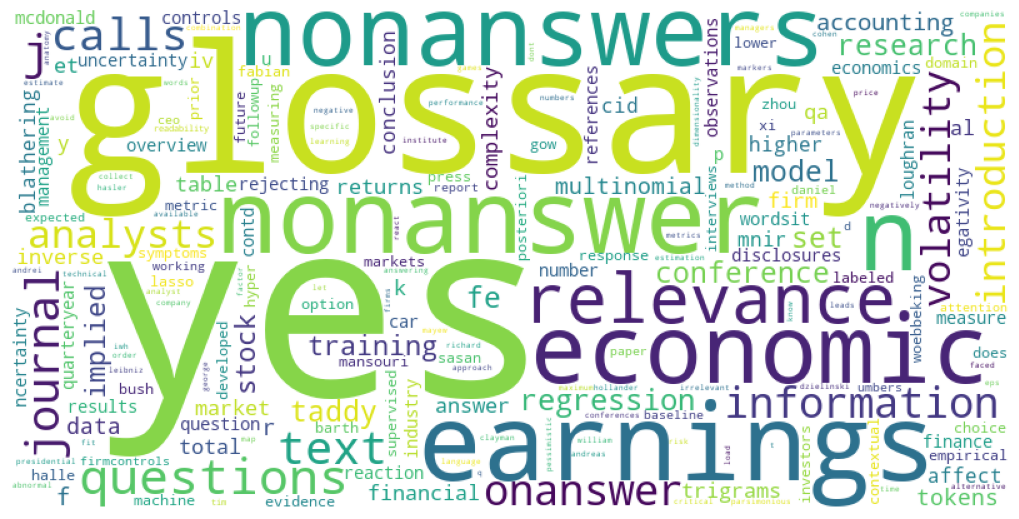

summary: let machine learning approach measuring nonanswers fabian woebbeking leibniz institute economic research halle iwh martin luther university hallewittenberg mlu joint work andreas barth sasan mansouri june motivation information asymmetry key friction economics transparency disclosures essential efficient markets secs plain english initiative questions answers qa targeted form information exchange teach computer detect question answered empirical evidence economic relevance nonanswers understanding prediction explainable ai introduction anatomy answer q answer nonanswer cause intention withold information inability provide information symptoms rejecting wont answer blathering beating bush postponing let introduction anatomy answer contd excuse boring bonehead questions cool elon musk tesla earnings senator certainly team specifics dont know sitting today mark zuckerberg senate hearing april introduction research objectives develop measure nonanswers supervised machine learning 

In [ ]:
# Frequency Analysis
word_freq = Counter(filtered_text.split())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)

# Plot the Word Cloud
plt.figure(figsize = (10, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


# Summarization using simple heuristic method
def generate_summary(text):
    sentences = text.split('.')
    return '. '.join(sentences[:3]) + '.' if len(sentences) > 3 else text

# Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment


# Generate Summary
summary = generate_summary(filtered_text)

# Perform Sentiment Analysis
sentiment = analyze_sentiment(filtered_text)

print("summary: " +summary)
print(sentiment)

Using OpenAI API to recreate results

In [ ]:
client = OpenAI(
    api_key="sk-proj-xxxxxxxxxxxxxxxxxxxxxxxxxx"
)

Summurization

In [ ]:

def summarize_text(extracted_text):
    """
    Calls the OpenAI API to summarize the provided text.

    Args:
        extracted_text (str): The text to be summarized.

    Returns:
        str: The summary of the text.
    """
    prompt = f"Summarize the following text:\n\n{extracted_text}"

    chat_completion = client.chat.completions.create(
        messages = [
            {
                "role":"user",
                "content":prompt
            },    
        ],
        model="gpt-3.5-turbo"
    )

    return chat_completion.choices[0].message.content

Summary = summarize_text(extracted_text)
print("Summary", Summary)

Summary The text discusses the use of machine learning to measure non-answers in information exchanges such as earnings conference calls. The development of a non-answer glossary is described, along with the economic relevance of non-answers in the context of market reactions and analyst behavior. The Multinomial Inverse Regression (MNIR) model is introduced for the analysis. The study finds that non-answers can impact stock returns and volatility, and that managers tend to avoid answering questions from pessimistic analysts. The text also explores the implications of non-answers on analyst behavior and future research areas.


Sentiment Analysis

In [ ]:

def analyze_sentiment(extracted_text):
    """
    Calls the OpenAI API to analyze the sentiment of the provided text.

    Args:
        extracted_text (str): The text for sentiment analysis.

    Returns:
        str: The sentiment analysis result.
    """

    prompt = f"Analyze the sentiment of the following text:\n\n{extracted_text}"

    chat_completion = client.chat.completions.create(
        messages = [
            {
                "role":"user",
                "content":prompt
            },    
        ],
        model="gpt-3.5-turbo"
    )

    return chat_completion.choices[0].message.content

sentiment = analyze_sentiment(extracted_text)
print("Sentiment Analysis:", sentiment)

Sentiment Analysis: The sentiment of the text is objective and informative. It presents research findings and methodology in a structured and academic manner, focusing on the development of a machine learning approach to measure non-answers in Q&A sessions. The text provides information on the motivation, methodology, results, and implications of the study, without showing any emotional bias or subjective opinions.


### Task: Sourcing

The first stage involves sourcing and reading the textual content of scientific papers. You find an example pdf file in ``../lit/nonanswers.pdf``. Please [download](https://scholar.google.de/) and analyze at least one additional paper of your choice (make sure to commit the paper to your repository).

Use an appropriate PDF reading library or tool to programmatically extract the text. You can find an example below, however, you are free to use any Python library you like.

In [7]:
# Step 1: Install pdfminer.six if you haven't already
# You can install it using conda or pip, see 
  # https://anaconda.org/conda-forge/pdfminer.six
  # https://pypi.org/project/pdfminer.six/

# Step 2: Import the required module
from pdfminer.high_level import extract_text

# Step 3: Extract text from PDF file
extracted_text = extract_text('../lit/Cho-HousePriceDynamics-1996.pdf')
print(extracted_text[0:80])

House Price Dynamics: A Survey of Theoretical and Empirical Issues 

Author(s): 


### Task: Pre-processing

Pre-processing is a critical step aimed at cleaning and preparing the text data for analysis. Steps that you should consider:

* Removing punctuation, numbers and special characters using regular expressions.
* Converting all the text to a uniform case (usually lower case) to ensure that the analysis is not case-sensitive.
* Stop word removal, i.e. eliminating commonly used words (e.g., 'and', 'the', 'is') that do not contribute significantly to the overall meaning and can skew the analysis.
* Other potential pre-processing steps might include stemming and lemmatization, depending on the specific requirements and goals of the analysis. (optional)

In [8]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


# Pre-processing steps
# 1. Remove punctuation, numbers, and special characters
cleaned_text = re.sub(r'[^A-Za-z\s]', '', extracted_text)

# 2. Convert to lower case
cleaned_text = cleaned_text.lower()

# 3. Remove stop words
stop_words = set(ENGLISH_STOP_WORDS)
filtered_text = ' '.join([word for word in cleaned_text.split() if word not in stop_words])


### Task: Analysis

The final stage is the analysis of the pre-processed text, in order to extract meaningful context. This may involve:

* Frequency Analysis: Determining the most commonly occurring words or phrases, which can provide initial insights into the primary focus areas of the papers. Consider, e.g. a word cloud as a visualization.
* Contextual Analysis: Using more advanced NLP techniques such as Word Embedding or Topic Modeling to understand the context of the papers.
* Sentiment analysis: We would expect that scientific papers are written in a neutral tone, can you confirm this?
* Summarization: Employing algorithms to generate concise summaries of the papers, capturing the key points and findings.

Pick any method that you like (you are allowed to use ChatGPT's API as well).

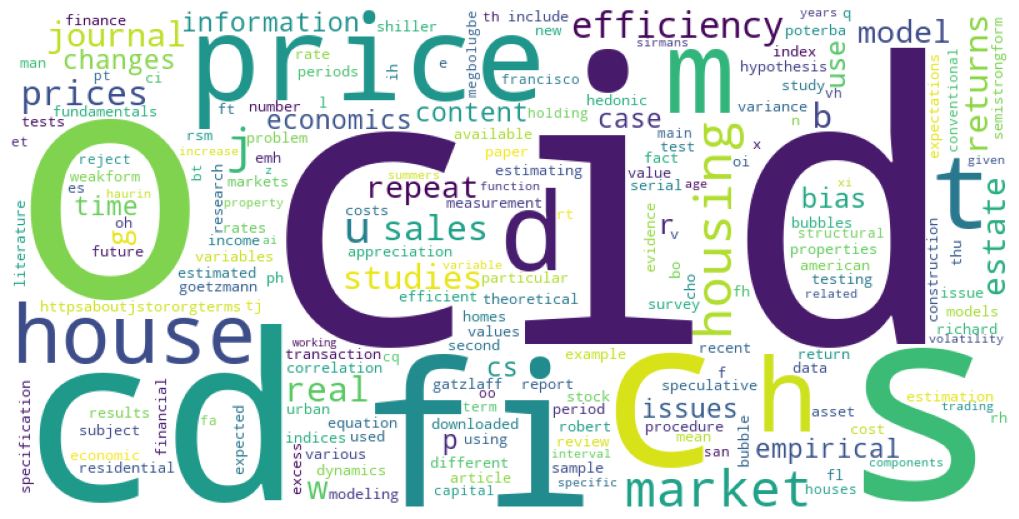

summary: house price dynamics survey theoretical empirical issues authors man cho source journal housing research vol special issue house price indices policy business research applications pp published amrealestatesoc stable url httpswwwjstororgstable jstor notforprofit service helps scholars researchers students discover use build wide range content trusted digital archive use information technology tools increase productivity facilitate new forms scholarship information jstor contact supportjstororg use jstor archive indicates acceptance terms conditions use available httpsaboutjstororgterms jstor working digitize preserve extend access journal housing research content downloaded cid thu cid cid use subject httpsaboutjstororgterms cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid cid journal housing research volume issue fannie mae foundation rights reserved house price dynamics survey theoretical empirical issues man cho abstract past decade number studies

In [13]:
# Frequency Analysis
word_freq = Counter(filtered_text.split())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)

# Plot the Word Cloud
plt.figure(figsize = (10, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


# Summarization using simple heuristic method
def generate_summary(text):
    sentences = text.split('.')
    return '. '.join(sentences[:3]) + '.' if len(sentences) > 3 else text

# Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment


# Generate Summary
summary = generate_summary(filtered_text)

# Perform Sentiment Analysis
sentiment = analyze_sentiment(filtered_text)

print("summary: " +summary)
print(sentiment)
print("NoAnserwers : Sentiment(polarity=0.05471381517033693, subjectivity=0.360861442904921)")